<a href="https://colab.research.google.com/github/geetanjalisawant16/Home_loan_Approval_prediction/blob/main/Home_loan_Approval_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

data = pd.read_csv(r"/content/loan_sanction_train.csv")
data_save = data.copy()

print(data.head())




    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [ ]:

print(data.shape)
print(data.Loan_Status.value_counts(normalize = True))
print(data.info())
print(data.describe())

(614, 13)
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  Coapplicant

#Conclusion:
Dataset size : (615, 13)
Target : Yes = 422, No = 192 -> 31% N / 69% Y (we have a unbalenced dataset)
Different types : object = 8, float = 4, int = 1
Missing values : We have 7 columns that contain missing values(not many values).


# Continuous variable histogram
We have here in both cases a positive asymmetry, which means that the outliers are on the left (mean > median). Indeed, the mean in the column CoapplicantIncome is 1621 while the median is 1188.
Same for the column LoanAmount


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


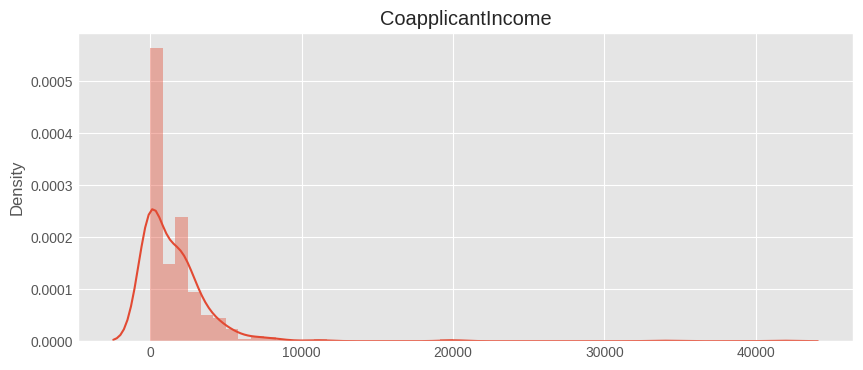

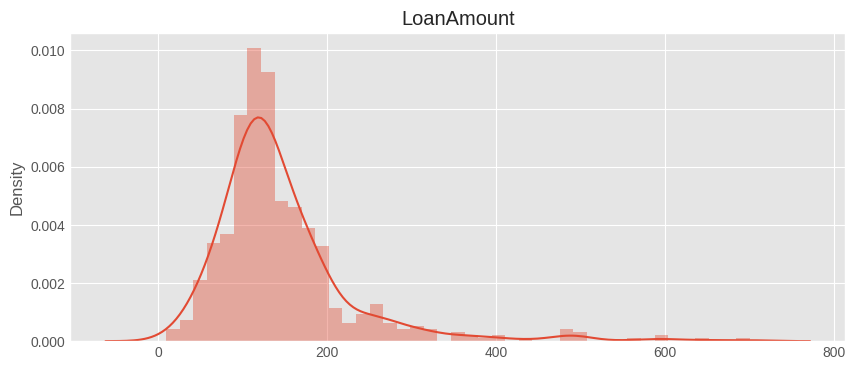

In [ ]:
for col in data.select_dtypes('float'):
    if col != 'Credit_History' and col != 'Loan_Amount_Term' :   # credit_history(1/0).
        plt.figure(figsize=[10,4])
        plt.title(col)
        print(sns.distplot(x = data[col]))

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


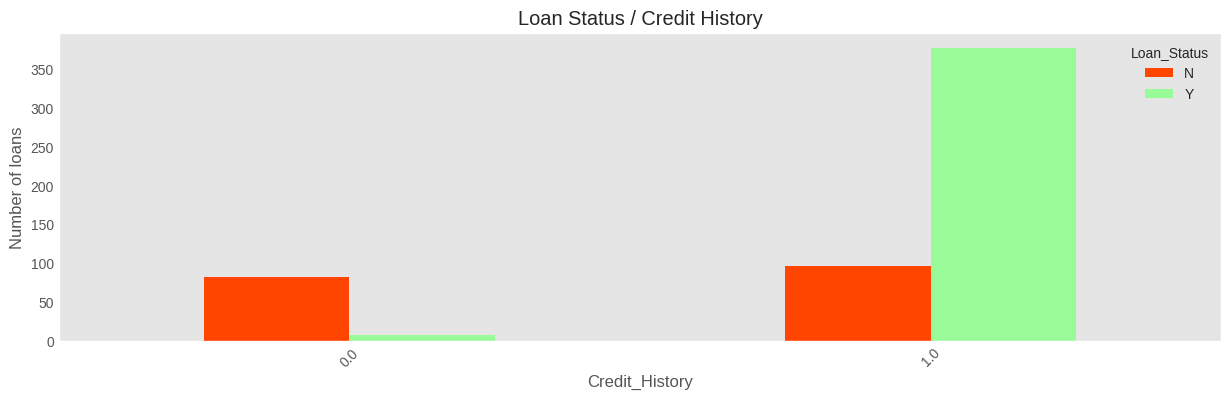

In [ ]:
#Ratio Credit_History / Target
pd.crosstab(data['Credit_History'], data['Loan_Status']).plot.bar(color = ['orangered', 'palegreen'], figsize = [15,4])
plt.xticks(rotation = 45)
plt.title('Loan Status / Credit History')
plt.grid()
plt.ylabel('Number of loans');

pd.crosstab(data['Credit_History'], data['Loan_Status'])

Credit_history / target: Concerning our column Credit_History, we can notice that a person having already contracted a loan in the past has a much better chance that his new loan will be accepted (79.5% against 7.8%). So we can hold a hypothesis that having taken out a loan in the past greatly influences the authorization of a new loan

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


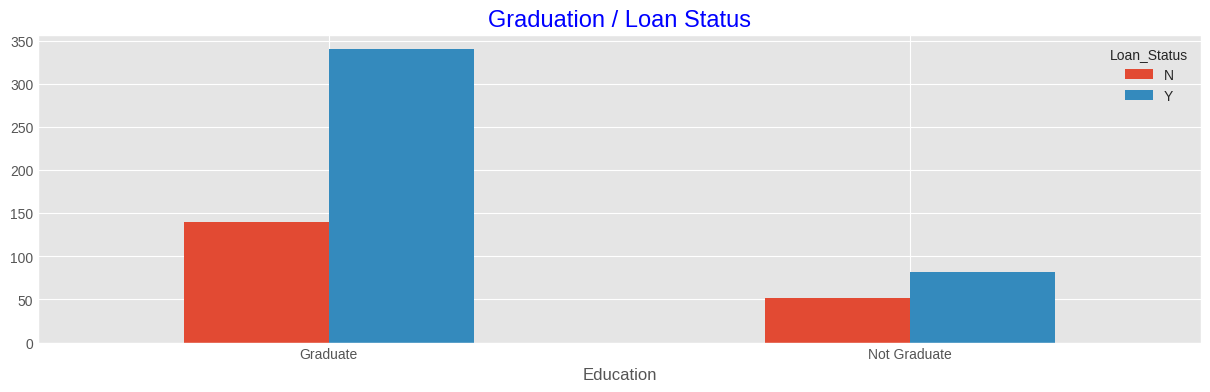

In [ ]:
#Ratio Graduate / Target
pd.crosstab(data.Education, data.Loan_Status).plot(kind = 'bar', figsize = [15,4])
plt.title('Graduation / Loan Status', color = 'blue', size = 17)
plt.style.use('seaborn-dark')
# plt.grid()
plt.xticks(rotation = 0);

pd.crosstab(data.Education, data.Loan_Status)


Education / Target: A graduate has a 70% chance of being able to take out a mortgage against 61% for a non-graduate. We can therefore assume that the fact of being a graduate or not has no real impact on the authorization of the loan.

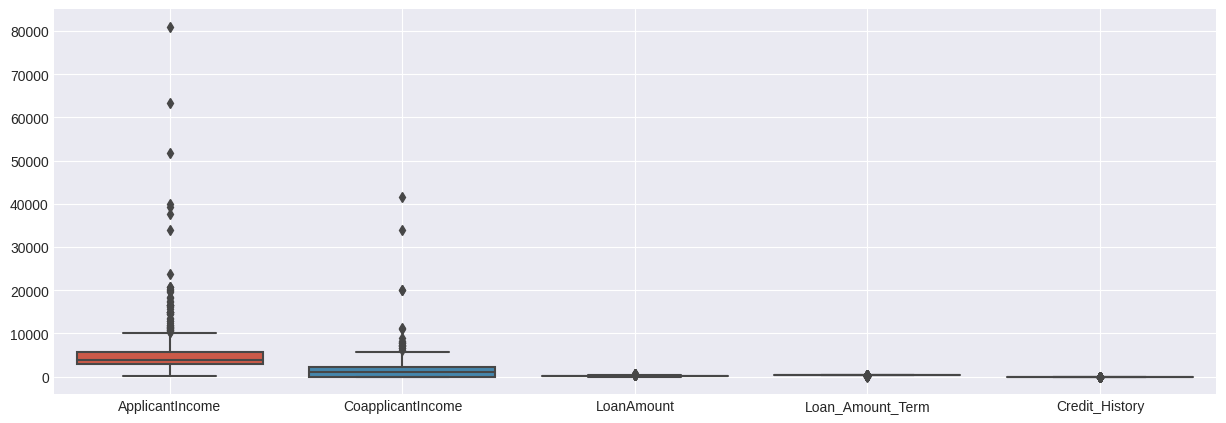

In [ ]:
#outliers
plt.figure(figsize= [15,5])
sns.boxplot(data = data)
plt.style.use('ggplot')
plt.grid()

In [ ]:
def detect_outlier(col):
    '''
    function to detect outliers (using z score)
    '''
    outliers = []
    threshold = 3                       # seuil standard
    mean = np.mean(col)
    std = np.std(col)

    for i in col :
        z_score = (i - mean) / std            # formule z-score
        if np.abs(z_score) > threshold :
            outliers.append(i)
    return outliers

In [ ]:
detect_outlier(data['ApplicantIncome'])   # drop 81000, 63000

[23803, 39999, 51763, 33846, 39147, 63337, 81000, 37719]

In [ ]:
detect_outlier(data['CoapplicantIncome'])    # drop 41000

[10968.0, 11300.0, 20000.0, 20000.0, 33837.0, 41667.0]

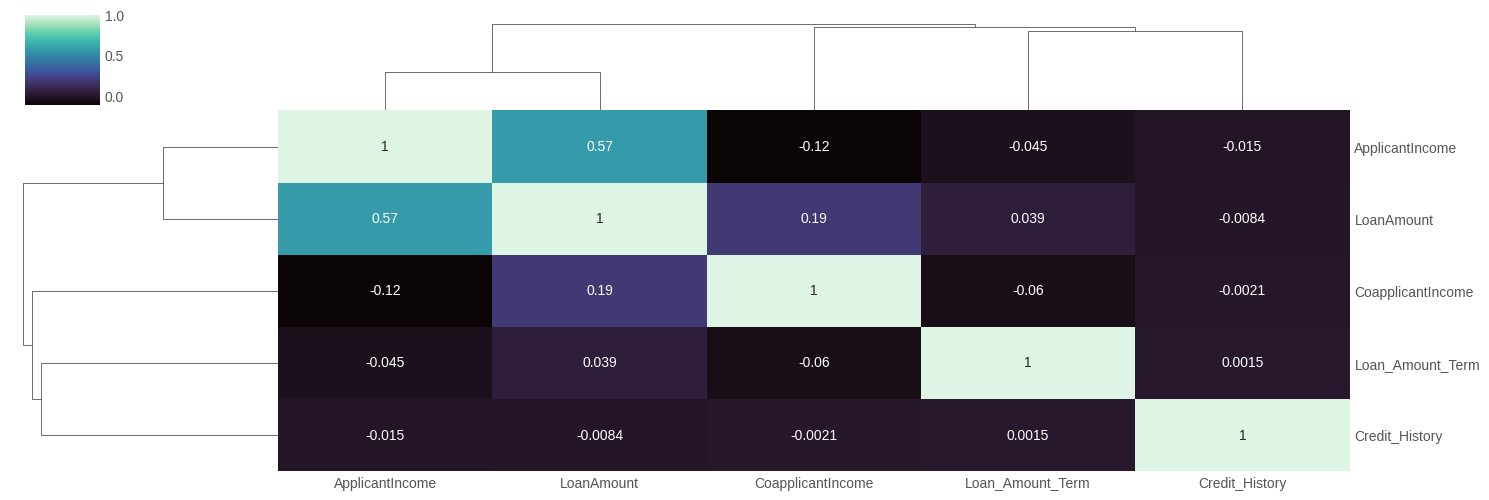

In [ ]:
#Correlation between variables
sns.clustermap(data.corr(), annot = True, figsize = [15,5], cmap="mako");

In [ ]:
#Imputation
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

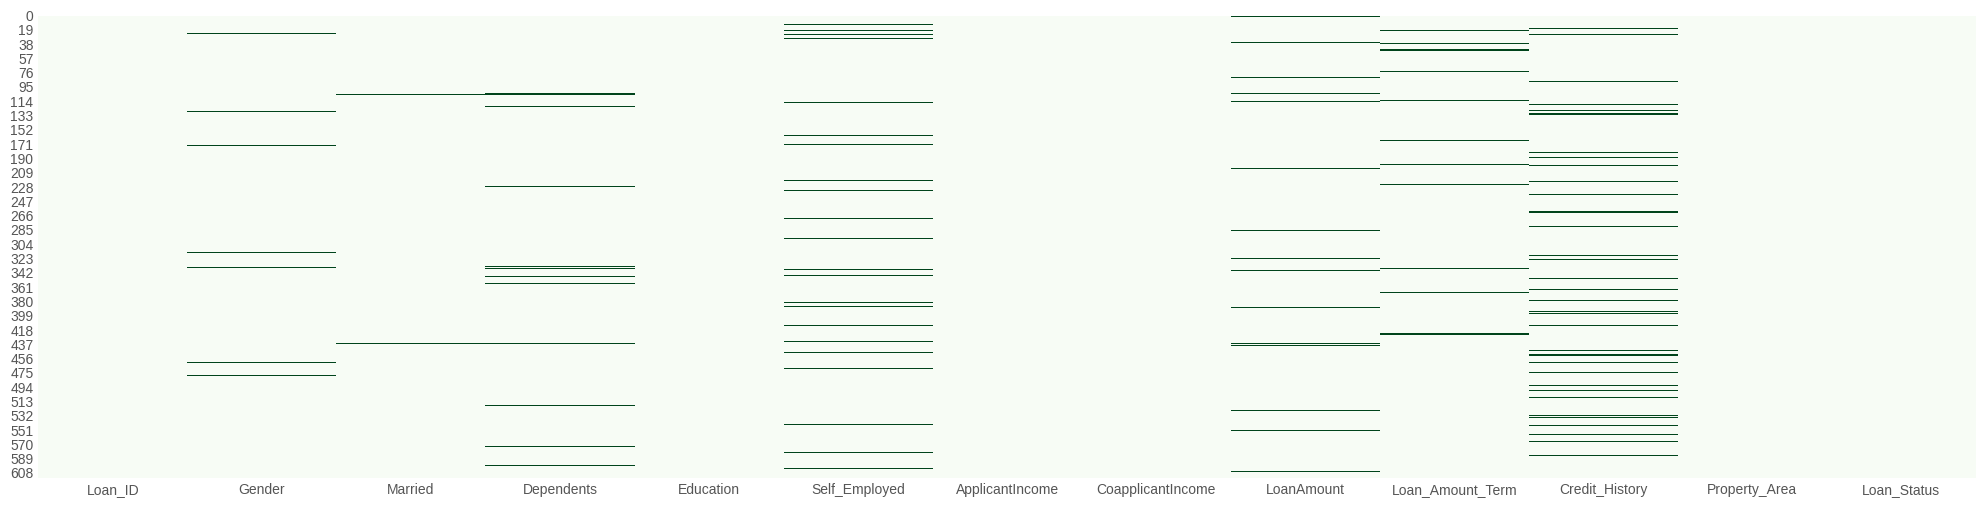

In [ ]:
# visualization of missing values

plt.figure(figsize=[25,6])
sns.heatmap(data.isna(), cbar= False,  cmap='Greens');

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


obj_lst = []    # object list
num_lst = []    # numerical list

for column, content in data.items():
    if pd.api.types.is_object_dtype(content):
            obj_lst.append(column)
    elif pd.api.types.is_numeric_dtype(content):
            num_lst.append(column)


object_imputer = SimpleImputer(missing_values=np.nan, strategy = 'constant', fill_value='missing')
int_imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')

imputer = ColumnTransformer([('object_lst', object_imputer, obj_lst),
                                ('int_lst', int_imputer, num_lst)])

In [ ]:
df = imputer.fit_transform(data)
df = pd.DataFrame(df, columns= ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
                                        'Self_Employed', 'Property_Area', 'Target_Loan_Status','ApplicantIncome',
                                        'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History'])

In [ ]:
df.isna().sum()


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Property_Area         0
Target_Loan_Status    0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
dtype: int64

In [ ]:
# return the numerical values to those who had it before the imputation

for element in num_lst:
    df[element] = pd.to_numeric(df[element])

In [ ]:
from imblearn.over_sampling import RandomOverSampler

x = df.drop('Target_Loan_Status', axis = 1)
y = df.Target_Loan_Status

In [ ]:
ross = RandomOverSampler()
x_resample, y_resample = ross.fit_resample(x, y)

In [ ]:
x_resample.shape

(844, 12)

In [ ]:
y_resample.value_counts()

Y    422
N    422
Name: Target_Loan_Status, dtype: int64

In [ ]:
x_resample.duplicated().count()

844

In [ ]:
#Encoding
#Features_columns
x_resample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            844 non-null    object 
 1   Gender             844 non-null    object 
 2   Married            844 non-null    object 
 3   Dependents         844 non-null    object 
 4   Education          844 non-null    object 
 5   Self_Employed      844 non-null    object 
 6   Property_Area      844 non-null    object 
 7   ApplicantIncome    844 non-null    float64
 8   CoapplicantIncome  844 non-null    float64
 9   LoanAmount         844 non-null    float64
 10  Loan_Amount_Term   844 non-null    float64
 11  Credit_History     844 non-null    float64
dtypes: float64(5), object(7)
memory usage: 79.2+ KB


In [ ]:
def encodage(dataframe):
    '''
    transforms object types into categorical and then into numeric
    '''
    for column, content in dataframe.items():
        if pd.api.types.is_object_dtype(content):
            dataframe[column] = content.astype('category').cat.as_ordered()

    for column, content in dataframe.items():          # category -> integer (+1)
        if pd.api.types.is_categorical_dtype(content):
                dataframe[column] =  pd.Categorical(content).codes + 1

In [ ]:
encodage(x_resample)

In [ ]:
#Label Encoder for the Target column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_resample = label_encoder.fit_transform(y_resample)

In [ ]:
y_resample[:15]

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
X = x_resample
Y = pd.DataFrame(y_resample, columns=['Target'])

Modelling
About metrics
Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

np.random.seed(0)

x_train, x_test,y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
def one_model(model_to_use, metrics = False, classif = False, conf_matrix = False, model = False):

    '''
    here is a function that is able to return several differents metrics
    '''

    np.random.seed(0)

    global x_train, x_test,y_train, y_test

    model = model_to_use
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    if metrics:

        print(f'For the model : {model_to_use} :')
        print(f'The recall_score is : {recall_score(y_test, y_pred)}')
        print(f'The f1_score is : {f1_score(y_test, y_pred)}')
        print(f'The precision_score is : {precision_score(y_test, y_pred)}')
        print(f'The accuracy_score is : {accuracy_score(y_test, y_pred)}\n')

    elif classif :
        print(classification_report(y_test, y_pred))

    elif conf_matrix:
        # print(confusion_matrix(y_test, y_pred))
        plt.figure(figsize=[10,6])
        sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'g', linewidths=1, cbar = False)
        plt.title('Confusion Matrix', size = 18);

    elif model :
        return model

In [ ]:
lst_model = [DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier(), SVC(), AdaBoostClassifier()]

In [ ]:
for element in lst_model:
    one_model(element, metrics = True)

For the model : DecisionTreeClassifier() :
The recall_score is : 0.8072289156626506
The f1_score is : 0.864516129032258
The precision_score is : 0.9305555555555556
The accuracy_score is : 0.8757396449704142

For the model : RandomForestClassifier() :
The recall_score is : 0.9397590361445783
The f1_score is : 0.9176470588235294
The precision_score is : 0.896551724137931
The accuracy_score is : 0.9171597633136095

For the model : KNeighborsClassifier() :
The recall_score is : 0.6385542168674698
The f1_score is : 0.6309523809523809
The precision_score is : 0.6235294117647059
The accuracy_score is : 0.6331360946745562

For the model : SVC() :
The recall_score is : 0.6265060240963856
The f1_score is : 0.5683060109289617
The precision_score is : 0.52
The accuracy_score is : 0.5325443786982249

For the model : AdaBoostClassifier() :
The recall_score is : 0.8433734939759037
The f1_score is : 0.7486631016042781
The precision_score is : 0.6730769230769231
The accuracy_score is : 0.72189349112426

We can see that the RandomForestRegressor model is the one that gets better results.

Features Importances
Feature importance refers to techniques that calculate a score for all input features for a given model - the scores simply represent the "importance" of each feature. A higher score means that the specific characteristic will have a greater effect on the model used to predict a certain variable.

In [ ]:
one_model(RandomForestClassifier(), model = True).feature_importances_

array([0.15939394, 0.02062172, 0.02341235, 0.04741835, 0.02104543,
       0.0274038 , 0.04933634, 0.16128173, 0.09384257, 0.15634199,
       0.03785157, 0.20205021])

In [ ]:
features_imp = pd.DataFrame(one_model(RandomForestClassifier(), model = True).feature_importances_, index = X.columns)
features_imp = features_imp.rename(columns = {0 : 'features_importances'})
features_imp

,features_importances
Loan_ID,0.159394
Gender,0.020622
Married,0.023412
Dependents,0.047418
Education,0.021045
Self_Employed,0.027404
Property_Area,0.049336
ApplicantIncome,0.161282
CoapplicantIncome,0.093843
LoanAmount,0.156342


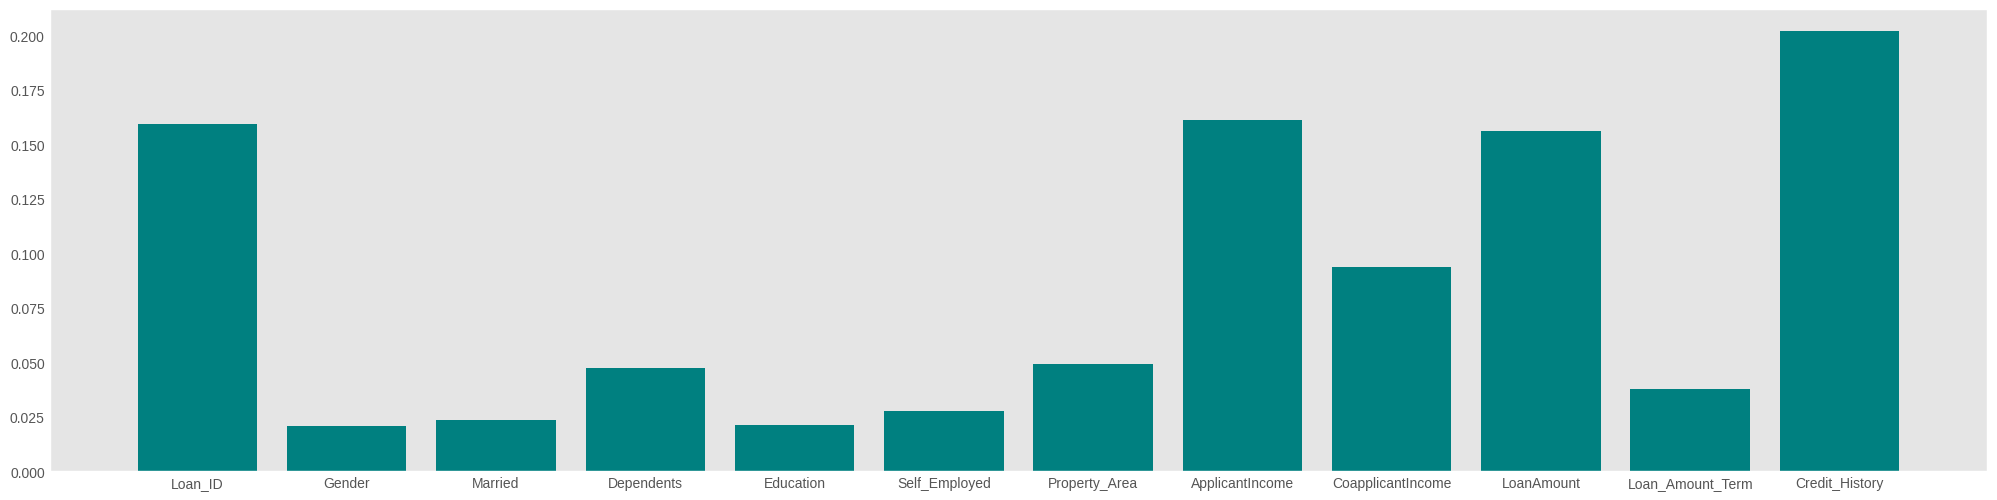

In [ ]:
plt.figure(figsize= [25,6])
plt.grid()
plt.bar(x = X.columns, height=features_imp.features_importances, color = 'teal');

We can see the features that our RandomForest model uses the most to predict the Target

Features selection
We will now try to optimize our model by removing the variables that do not vary (or the least) with the target

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def select_kbest():

    np.random.seed(0)
    for i in range(8,13):
        model_opt = make_pipeline(SelectKBest(f_classif, k = i),
                                  RandomForestClassifier())
        print(one_model(model_opt, metrics=True))

In [ ]:
select_kbest();

For the model : Pipeline(steps=[('selectkbest', SelectKBest(k=8)),
                ('randomforestclassifier', RandomForestClassifier())]) :
The recall_score is : 0.8433734939759037
The f1_score is : 0.8805031446540881
The precision_score is : 0.9210526315789473
The accuracy_score is : 0.8875739644970414

None
For the model : Pipeline(steps=[('selectkbest', SelectKBest(k=9)),
                ('randomforestclassifier', RandomForestClassifier())]) :
The recall_score is : 0.8674698795180723
The f1_score is : 0.8888888888888888
The precision_score is : 0.9113924050632911
The accuracy_score is : 0.893491124260355

None
For the model : Pipeline(steps=[('selectkbest', SelectKBest()),
                ('randomforestclassifier', RandomForestClassifier())]) :
The recall_score is : 0.8554216867469879
The f1_score is : 0.8765432098765433
The precision_score is : 0.8987341772151899
The accuracy_score is : 0.8816568047337278

None
For the model : Pipeline(steps=[('selectkbest', SelectKBest(k=11)),
   

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        86
           1       0.90      0.94      0.92        83

    accuracy                           0.92       169
   macro avg       0.92      0.92      0.92       169
weighted avg       0.92      0.92      0.92       169



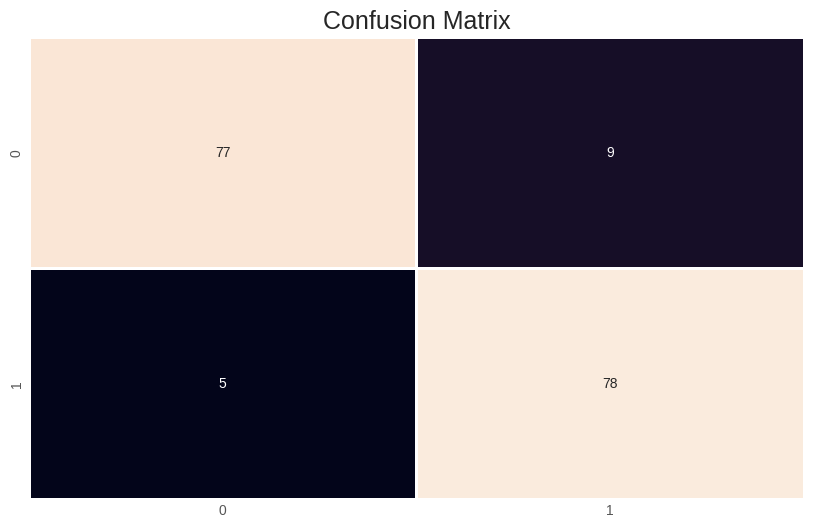

In [ ]:
one_model(RandomForestClassifier(), conf_matrix=True), one_model(RandomForestClassifier(), classif=True);

We can see from this matrix that out of 86 people who have had their mortgage accepted, the model has succeeded in predicting 76 (88.37% good answers).

We can also see this on the negatives, where the model predicted 78 correct answers out of 83 (93% good answers).

In [ ]:
#Oprimization By RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

model_grid = RandomForestClassifier()
model_grid.fit(x_train, y_train)
print(f'The Accuracy Score is : {round(model_grid.score(x_test, y_test),2)*100} %')

The Accuracy Score is : 92.0 %


In [ ]:
%time

np.random.seed(0)

search_params = {'n_estimators' : [50,100,150,200,250, 300],
                  'criterion' : ['gini', 'entropy', 'log_loss'],
                  'max_features' : ['sqrt', 'log2', None],
                  'n_jobs' : [-1,1,None],
                  'random_state': [2,4,6,8,10]}

search = RandomizedSearchCV(model_grid, param_distributions= search_params, n_iter = 10, cv = 5)
search.fit(x_train, y_train)
print(f'The best estimator is : {search.best_estimator_}')
print(f'The best score is : {search.best_score_}')
print(f'The best parameters are : {search.best_params_}')

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.7 µs
The best estimator is : RandomForestClassifier(criterion='log_loss', n_estimators=250, random_state=8)
The best score is : 0.8844444444444445
The best parameters are : {'random_state': 8, 'n_jobs': None, 'n_estimators': 250, 'max_features': 'sqrt', 'criterion': 'log_loss'}


In [ ]:
one_model(RandomForestClassifier(random_state = 2, n_jobs = None, n_estimators =  200, max_features = 'sqrt', criterion =  'gini'),
         metrics = True, conf_matrix = True)

For the model : RandomForestClassifier(n_estimators=200, random_state=2) :
The recall_score is : 0.9397590361445783
The f1_score is : 0.9176470588235294
The precision_score is : 0.896551724137931
The accuracy_score is : 0.9171597633136095



In [ ]:
#Prediction
test_set = pd.read_csv('/content/loan_sanction_test.csv')
test_set2 = test_set.copy()
test_set.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
x_train.shape, test_set.shape

((675, 12), (367, 12))

In [ ]:
# imputation for test_set

obj_lst_test = []    # object list
num_lst_test = []    # numerical list

for column, content in test_set.items():
    if pd.api.types.is_object_dtype(content):
        obj_lst_test.append(column)
    elif pd.api.types.is_numeric_dtype(content):
        num_lst_test.append(column)


object_imputer = SimpleImputer(missing_values=np.nan, strategy = 'constant', fill_value='missing')
int_imputer = SimpleImputer(missing_values=np.nan, strategy = 'median')


imputer_test = ColumnTransformer([('object_lst_test', object_imputer, obj_lst_test),
                            ('int_lst_test', int_imputer, num_lst_test)])

In [ ]:
df_test = imputer_test.fit_transform(test_set)
df_test = pd.DataFrame(df_test, columns= ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
                                'Self_Employed', 'Property_Area','ApplicantIncome',
                                'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History'])

In [ ]:
df_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [ ]:
# encoding test_set

encodage(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Loan_ID            367 non-null    int16
 1   Gender             367 non-null    int8 
 2   Married            367 non-null    int8 
 3   Dependents         367 non-null    int8 
 4   Education          367 non-null    int8 
 5   Self_Employed      367 non-null    int8 
 6   Property_Area      367 non-null    int8 
 7   ApplicantIncome    367 non-null    int16
 8   CoapplicantIncome  367 non-null    int16
 9   LoanAmount         367 non-null    int16
 10  Loan_Amount_Term   367 non-null    int8 
 11  Credit_History     367 non-null    int8 
dtypes: int16(4), int8(8)
memory usage: 5.9 KB


In [ ]:
#Prediction on test_set
final_model = one_model(RandomForestClassifier(random_state = 4, n_jobs = None, n_estimators =  200, max_features = 'sqrt', criterion =  'gini'),
                        model=True)

In [ ]:
predictions = final_model.predict(df_test)

In [ ]:
df_test['Prediction'] = predictions
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Prediction
0,1,2,2,1,1,1,3,252,1,53,11,2,1
1,2,2,2,2,1,1,3,103,44,68,11,2,1
2,3,2,2,3,1,1,3,231,68,120,11,2,0
3,4,2,2,3,1,1,3,44,111,43,11,2,1
4,5,2,1,1,2,1,3,121,1,26,11,2,0


In [ ]:
df_test.Prediction.value_counts()

0    244
1    123
Name: Prediction, dtype: int64